# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [22]:
# Load the libraries as required.
import pandas as pd

In [23]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [24]:
# Features data
X = fires_dt.iloc[:,:-1]
print(X.describe())

# Target data
Y = fires_dt["area"]
print(Y.describe())

          coord_x     coord_y        ffmc         dmc          dc         isi  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          rh        wind        rain  
count  517.000000  517.000000  517.000000  517.000000  
mean    18.889168   44.288201    4.017602    0.021663  
std      5.806625   16.317469    1.791653    0.295959  
min      2.200000   15.000000    0.400000    0

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Define numerical and categorical columns
num_cols = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = [ 'month', 'day']

# Create transformations for numerical columns
num1_transforms = Pipeline(steps=[
    ('scaler', RobustScaler())  # RobustScaler for outlier-resistant scaling
])

# Create transformations for categorical columns
cat1_transforms = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))  # One-hot encoding
])

# Combine into a ColumnTransformer
preproc1 = ColumnTransformer(
    transformers=[
        ('num', num1_transforms, num_cols),
        ('cat', cat1_transforms, cat_cols)
    ], remainder='passthrough'
)

# Check the ColumnTransformer to see if it matches expected outcome
preproc1

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

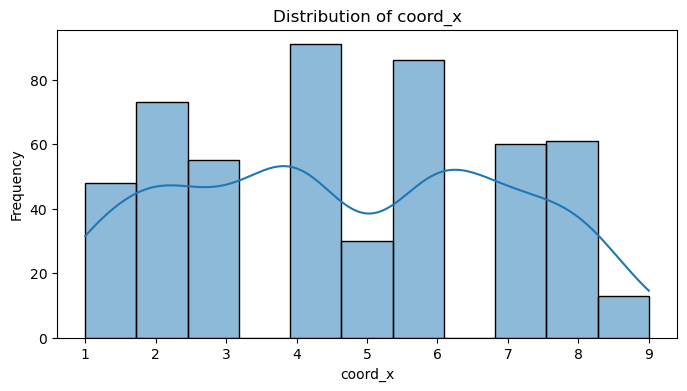

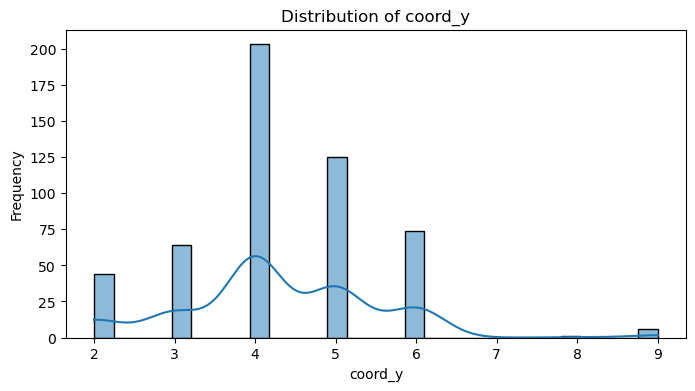

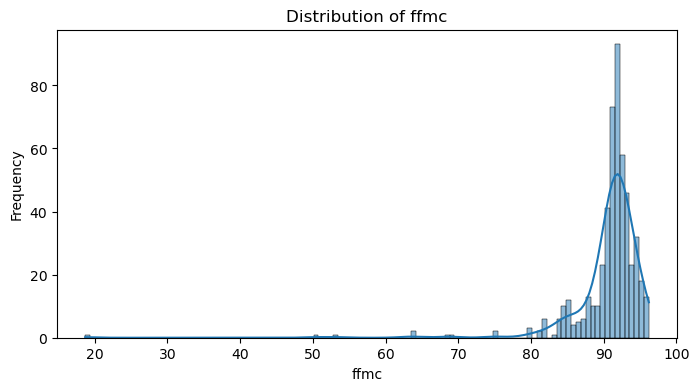

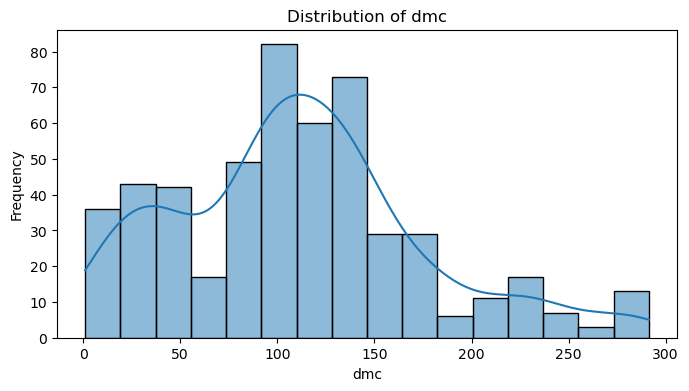

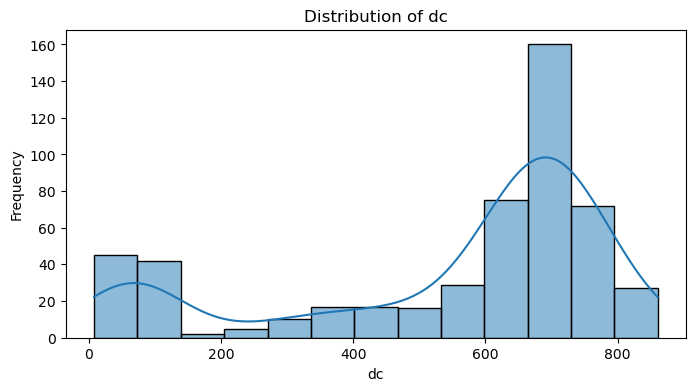

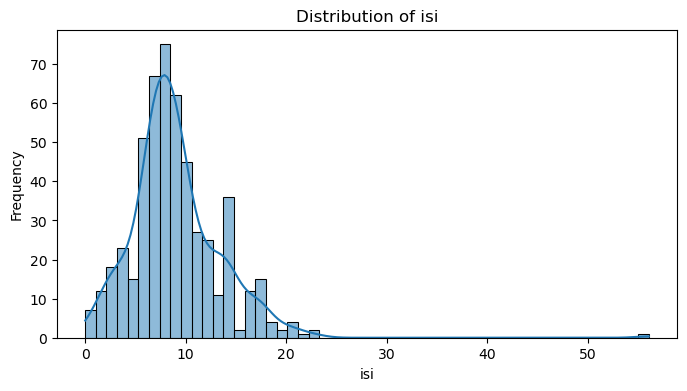

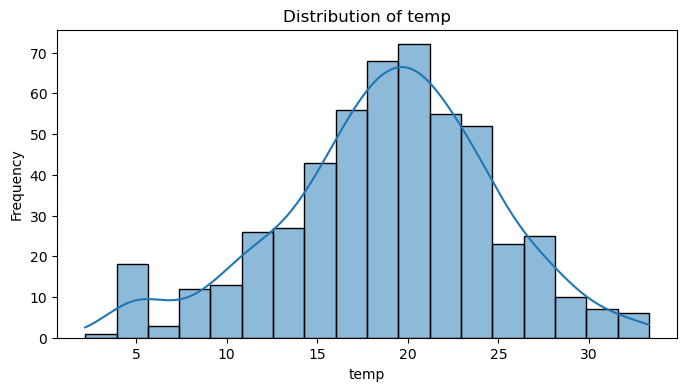

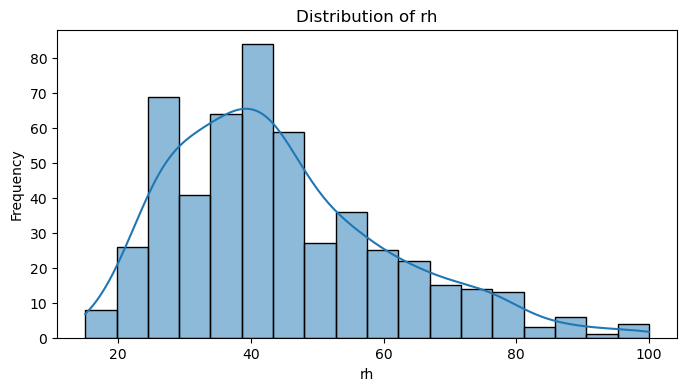

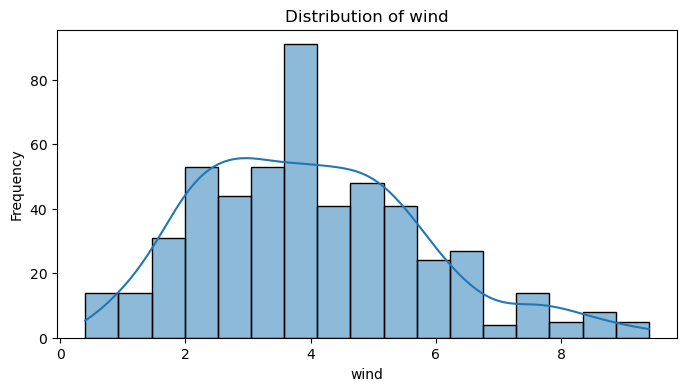

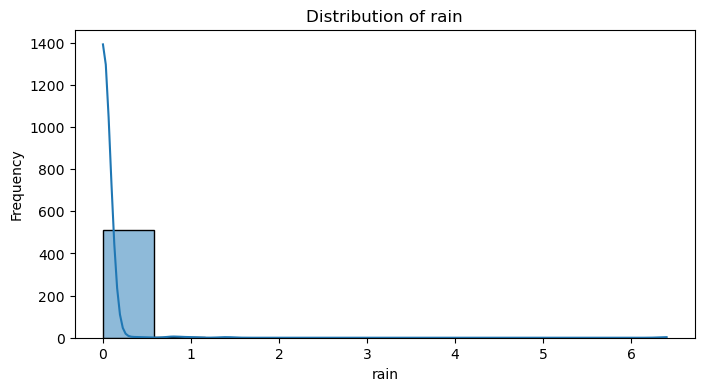

In [26]:
# Before I decide which columns to apply non-linear transformations on, it is helpful to visualize the distribution of these features as histograms.
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(fires_dt[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# By visually inspecting the histograms below, the columns ffmc, dc, isi, and rh have significant skews (left or right) in the distribution. I will apply Yeo-Johnson transformation on these four columns.


In [27]:
from sklearn.preprocessing import PowerTransformer

# Numerical columns to scale and transform.
num_cols_std = ['coord_x', 'coord_y','dmc', 'temp', 'wind', 'rain']
num_cols_yj = ['ffmc','dc', 'isi', 'rh']
cat_cols = [ 'month', 'day']

# Create standardization for numerical columns
num2_transforms = Pipeline(steps=[
    ('scaler', RobustScaler()), # RobustScaler for outlier-resistant scaling
        
])

# Create yj transformation for select numerical columns
yj_transforms = Pipeline(steps=[
    ('transform', PowerTransformer(method='yeo-johnson')) # Yeo-Johnson transformation on skewed features
])


# Create transformations for categorical columns
cat2_transforms = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))  # One-hot encoding
])

# Combine into a ColumnTransformer
preproc2 = ColumnTransformer(
    transformers=[
        ('num', num2_transforms, num_cols_std),
        ('cat', cat2_transforms, cat_cols),
        ('yj', yj_transforms, num_cols_yj)
    ]
)

# Check the ColumnTransformer to see if it matches expected outcome
preproc2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['coord_x', 'coord_y', 'dmc', 'temp', 'wind',
                                  'rain']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['month', 'day']),
                                ('yj',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer())]),
                                 ['ffmc', 'dc', 'isi', 'rh'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [28]:
# K-nearest neighbours used as baseline regressor

from sklearn.neighbors import KNeighborsRegressor

# Pipeline A = preproc1 + baseline
pipeA = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', KNeighborsRegressor())
])
pipeA

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor())])

In [29]:
# Pipeline B = preproc2 + baseline
pipeB = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', KNeighborsRegressor())
])
pipeB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'dmc',
                                                   'temp', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day']),
                                                 ('yj',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer())]),
                                                  ['ffmc', 'dc', 'isi',
                                                   'rh'])])),
                ('regressor', KNeighborsRegressor())])

In [30]:
# Using SVR as advanced regressor

from sklearn.svm import SVR

# Pipeline C = preproc1 + advanced model
pipeC = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', SVR())
])
pipeC

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', SVR())])

In [31]:
# Pipeline D = preproc2 + advanced model
pipeD = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', SVR())
])
pipeD
    

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'dmc',
                                                   'temp', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day']),
                                                 ('yj',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer())]),
                                                  ['ffmc', 'dc', 'isi',
                                                   'rh'])])),
                ('regressor', SVR())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [32]:
# Pipe A
# The hyperparameters regressor_n_neighbors and regressor_weights will be tuned.

# First, data is split 70-30% into test and train sets. 

from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y,
    test_size=0.3, 
    random_state=42
) 

# Grid Search

knn_param_grid = {
    'regressor__n_neighbors': [2,4,6,8,10],
    'regressor__weights': ['uniform', 'distance']
}

scoring = ['accuracy', 'precision', 'recall']

grid_knn1 = GridSearchCV(pipeA, 
                         knn_param_grid,
                         cv=5, 
                        scoring='neg_mean_absolute_error',  # MAE as the scoring metric 
                        refit=True)

grid_knn1.fit(X_train, Y_train)


c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [2, 4, 6, 8, 10],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [33]:
# PipeB

knn_param_grid = {
    'regressor__n_neighbors': [2,4,6,8,10],
    'regressor__weights': ['uniform', 'distance']
}

scoring = ['accuracy', 'precision', 'recall']

grid_knn2 = GridSearchCV(pipeB, 
                         knn_param_grid,
                         cv=5, 
                        scoring='neg_mean_absolute_error',  # MAE as the scoring metric 
                        refit=True)

grid_knn2.fit(X_train, Y_train)


c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'dmc',
                                                                          'temp',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day']),
                                                                        ('yj',
                                                                         Pipeline(steps=[('transform',
                                                                                          PowerTransformer())]),
                                                                         ['ffmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'rh'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [2, 4, 6, 8, 10],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [34]:
# PipeC

svr_param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__gamma': ['scale', 'auto']
}

grid_svr1 = GridSearchCV(pipeC, svr_param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_svr1.fit(X_train, Y_train)

c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__epsilon': [0.01, 0.1, 0.2],
                         'regressor__gamma': ['scale', 'auto'],
                         'regressor__kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [35]:
# PipeD

svr_param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__gamma': ['scale', 'auto']
}

grid_svr2 = GridSearchCV(pipeD, svr_param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_svr2.fit(X_train, Y_train)

c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'dmc',
                                                                          'temp',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day']),
                                                                        ('yj',
                                                                         Pipeline(steps=[('transform',
                                                                                          PowerTransformer())]),
                                                                         ['ffmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'rh'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__epsilon': [0.01, 0.1, 0.2],
                         'regressor__gamma': ['scale', 'auto'],
                         'regressor__kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

# Evaluate

+ Which model has the best performance?

In [36]:
# Check MAE scores and tuned hyperparameters to determine the model with best performance

#Model A
print("Best parameters for Pipe A:", grid_knn1.best_params_)
print("Best MAE for Pipe A:", -grid_knn1.best_score_)

#Model B
print("Best parameters for Pipe B:", grid_knn2.best_params_)
print("Best MAE for Pipe B:", -grid_knn2.best_score_)

# Model C
print("Best parameters for Pipe C:", grid_svr1.best_params_)
print("Best MAE for Pipe C:", -grid_svr1.best_score_)  

# Model D
print("Best parameters for Pipe D:", grid_svr2.best_params_)
print("Best MAE for Pipe D:", -grid_svr2.best_score_) 


Best parameters for Pipe A: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Best MAE for Pipe A: 17.700285464231353
Best parameters for Pipe B: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Best MAE for Pipe B: 17.789216514459667
Best parameters for Pipe C: {'regressor__C': 1, 'regressor__epsilon': 0.2, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
Best MAE for Pipe C: 11.87892196926575
Best parameters for Pipe D: {'regressor__C': 1, 'regressor__epsilon': 0.2, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
Best MAE for Pipe D: 11.887635126068735


Based on the scoring metric outputs above, Pipes C and D performed better than A and B. The use of the advanced regressor SVR improved model performance. 
The difference in MAE between pipes C and D are very small, suggesting that non-linear transformations applied to select numerical features did not significantly affect model performance. 

# Export

+ Save the best performing model to a pickle file.

In [37]:
import pickle

# Get the best model from the GridSearchCV
best_pipeC = grid_svr1.best_estimator_

# Export the best model to a pickle file
model_filename = 'best_model_pipeC.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_pipeC, file)


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

Using 156 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:14<00:00, 14.50s/it]


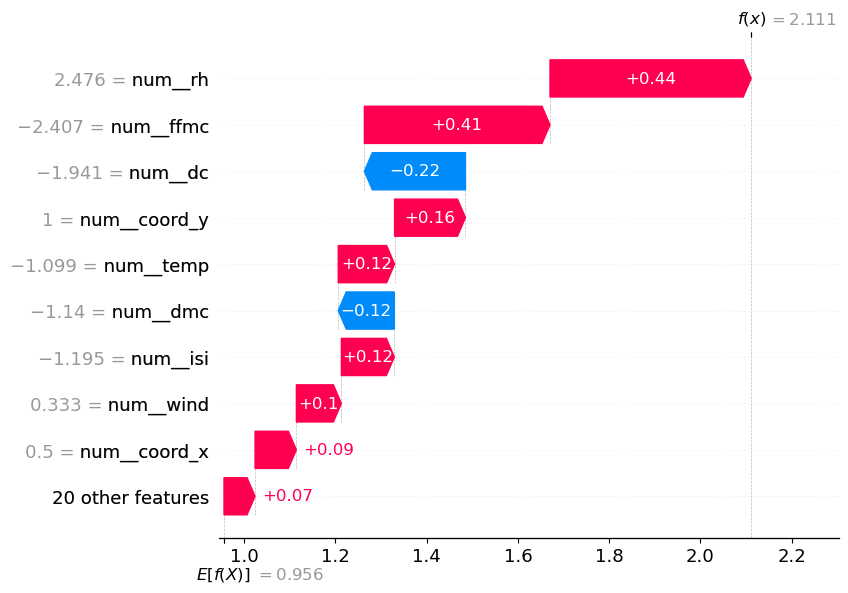

In [ ]:
import shap
import numpy as np

np.random.seed(42)

# Transform the test data using the preprocessing step of the best model
data_transform = grid_svr1.best_estimator_.named_steps['preprocessing'].transform(X_test)
data_transform = np.array(data_transform, dtype=np.float64)  # Ensure numeric type

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(
    grid_svr1.best_estimator_.named_steps['regressor'].predict,
    data_transform
)

# Select one observation from the transformed test set
single_observation = data_transform[0].reshape(1, -1)

# Calculate SHAP values for the single observation
shap_values_single = explainer.shap_values(single_observation)

# Create a SHAP Explanation object with feature names
shap_explanation_single = shap.Explanation(
    values=shap_values_single,
    base_values=explainer.expected_value,
    data=single_observation,
    feature_names=grid_svr1.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
)

# Visualize SHAP values for the single observation
shap.plots.waterfall(shap_explanation_single[0])

# According to the waterfall plot, num_rh, num_ffmc, and num_dc had the most influence in predicting this observation's outcome. 


c:\Users\Himeshi II\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
100%|██████████| 20/20 [01:42<00:00,  5.14s/it]


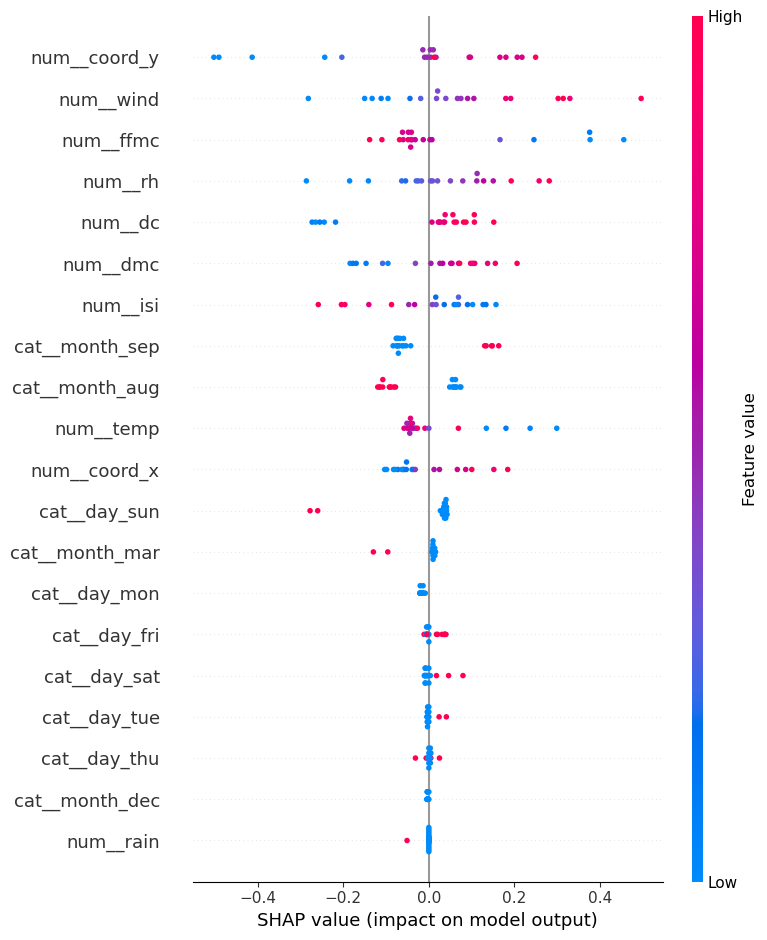

In [40]:
# Since the full dataset takes a long time to run, I randomly selected 20 observations from the test set and selected 50 observations for background.

np.random.seed(42)
background_data = shap.kmeans(data_transform, 50) 

# Randomly select 20 observations from the test set
subset_indices = np.random.choice(data_transform.shape[0], 20, replace=False)
data_subset = data_transform[subset_indices]

# Use SHAP KernelExplainer with summarized background data
explainer = shap.KernelExplainer(
    grid_svr1.best_estimator_.named_steps['regressor'].predict, 
    background_data
)

# Calculate SHAP values for the subset
shap_values_subset = explainer.shap_values(data_subset)

# Generate SHAP summary plot for the subset
shap.summary_plot(
    shap_values_subset, 
    data_subset, 
    feature_names=grid_svr1.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
)


According to the summary plot shown above based on the 20 randomly selected observations, the most influencial features in the model appear to be num_coord_y (location), num_wind, num_ffmc, and num_rh. The features that appear towwards the lower end of the plot (ex: num_rain, cat_month_dec) had very little influence on model predictions and are candidates for removal. Removing these features might reduce noise and decrease computational complexity when running the model.
To test the impact of feature removal, I would re-train the model with the reduced feature set and compare its performance with the original model using metrics like MAE.

## Criteria

The [rubric](./assignment_3_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.